In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('..')

import src as sc

# Prepare Campus Data

The cell below can also be carried out in one step by running 
```
> cd src
> python locations.py 
```
from the top level directory.

In [11]:
# One-hot table with halls as rows and schools as columns.
hall_df = sc.get_hall_by_school_table()

# Dataframe with one row per enrolled student.
student_df = sc.get_student_enrollment_data()

# Proportionally assigns students to buildings, writing
# student dataframes to csv as:
#      "../data/filled_buildings/<building_name>_students.csv"

sc.fill_buildings(student_df = student_df, hall_df = hall_df)

# Compute Cost & Assignment Matrix

The cell below can also be carried out in one step by running
```
> cd src
> python learning.py "assign_with_downsampling" -1 10 
```
from the top level directory.

In [12]:
# Load mappings
gender_map, race_map, region_map = sc.get_mapping_dicts()

# Load data
hall_df, student_df, art_df = sc.load_data()

# Get quantized student data.
gender_quant_s, race_quant_s = sc.get_quantized_student_data(    
                                                    student_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get quantized  art data.
gender_quant_a, race_quant_a = sc.get_quantized_art_data(    
                                                    art_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)
# Get art_capacity_df
art_capacity_df = sc.get_art_capacity_with_downsampling(art_df,
                    categories = ["gender","race"])
art_capacity_df

,tuple,string,original_index,capacity
0,"(1, 1)","Woman, White",1104,100.0
1,"(1, 2)","Woman, Asian",302,4.0
2,"(1, 3)","Woman, Hispanics of any race",1863,4.0
3,"(1, 4)","Woman, Black or African American",997,7.0
4,"(1, 6)","Woman, American Indian or Alaska Native",1001,15.0
5,"(2, 1)","Man, White",1441,100.0
6,"(2, 2)","Man, Asian",83,35.0
7,"(2, 3)","Man, Hispanics of any race",957,100.0
8,"(2, 4)","Man, Black or African American",1048,54.0
9,"(2, 5)","Man, Two or more races",356,1.0


In [13]:
# Get building_capacity_df.
building_capacity_df = sc.get_building_capacity_df()
building_capacity_df

,capacity
aidekman,222
anderson,2
ballou,36
capen_house,1
clic,1
dental_school,5
eaton_hall,1
fine_arts_house,3
gifford_house,24
goddard_chapel,15


In [14]:
# Compute full n_buildings x n_artworks cost matrix.
cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                    hall_df = hall_df,
                                    categories = ["gender","race"],
                                    alpha = -.00001,
                                    beta = 1000000)

# Reduce cost df to remove duplicate columns.
cost_df = cost_df.rename(columns = {art_capacity_df.loc[i,"tuple"]:art_capacity_df.loc[i,"string"] for i in art_capacity_df.index})

cost_df

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,0.262792,0.0,0.0,0.0,0.212232,0.199973,0.000194,0.049846,0.037231,0.0,0.237732
anderson,0.275474,0.0,0.0,0.0,0.181087,0.23529,0.000024,0.034664,0.02302,0.0,0.250442
ballou,0.263793,0.0,0.0,0.0,0.213148,0.196053,0.000163,0.050103,0.038187,0.0,0.238554
capen_house,0.091699,0.091699,0.091699,0.091699,0.091699,0.091699,0.091699,0.091699,0.083012,0.091699,0.091699
clic,0.275474,0.0,0.0,0.0,0.181087,0.23529,0.000024,0.034664,0.02302,0.0,0.250442
dental_school,0.170978,0.001205,0.021267,0.001336,0.170978,0.163485,0.044578,0.141787,0.117769,0.000007,0.166611
eaton_hall,0.259653,0.0,0.0,0.0,0.209491,0.198805,0.000277,0.05333,0.04366,0.0,0.234783
fine_arts_house,0.278261,0.0,0.0,0.0,0.182651,0.196448,0.000197,0.05171,0.039251,0.0,0.251482
gifford_house,0.141331,0.001759,0.057046,0.07535,0.115092,0.138647,0.086227,0.125984,0.117119,0.000115,0.141331
goddard_chapel,0.145691,0.002807,0.061368,0.023705,0.120713,0.143553,0.108398,0.13045,0.117513,0.000112,0.145691


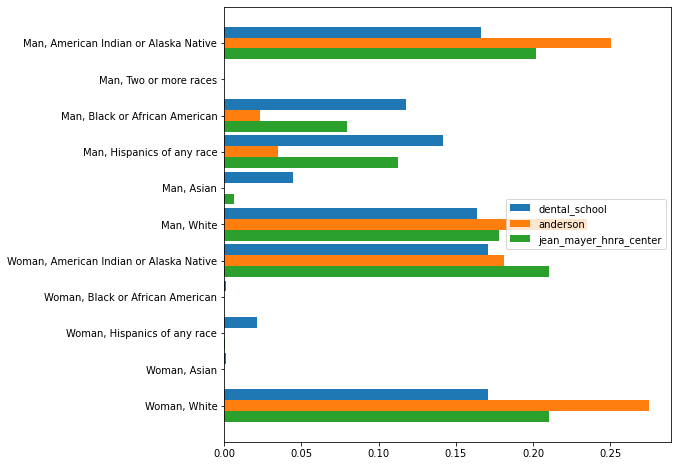

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
height = 0.3
offset = .3
for i in ["dental_school","anderson","jean_mayer_hnra_center"]:
    ax.barh(y = [j + offset for j in range(cost_df.shape[1])],
            width = cost_df.loc[i,:].values, 
            label = i,
            height = height)
    offset += -0.3
    

ax.set_yticks([j for j in range(art_capacity_df.shape[0])])
ax.set_yticklabels(art_capacity_df["string"])
plt.legend()
plt.show()

In [18]:
assignment_df = sc.learn_optimal_assignment(cost_df, 
                             building_capacity_df, 
                             art_capacity_df, 
                             lam = 100, init=1) # lambda, you can change this.

# Convert the assignment array to a dataframe for readability.
#assignment_df = pd.DataFrame(P, index = cost_df.index,
#                   columns = art_capacity_df["string"].values)
P

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,50.498528,2.040748,2.060206,3.585331,7.507329,50.547206,17.865456,50.661908,27.524696,0.179486,9.529105
anderson,0.45281,0.018243,0.019282,0.032703,0.066933,0.4531,0.160235,0.458416,0.246662,0.008759,0.082857
ballou,8.179476,0.328439,0.34082,0.58393,1.190715,8.199634,2.880933,8.239707,4.429173,0.113524,1.513648
capen_house,0.230399,0.007129,0.007649,0.014361,0.035416,0.22967,0.078136,0.227963,0.122044,0.002346,0.044887
clic,0.226404,0.009123,0.009642,0.016354,0.033473,0.226548,0.080129,0.229203,0.123348,0.004339,0.041436
dental_school,1.143465,0.04545,0.045867,0.081565,0.16832,1.140652,0.395535,1.134535,0.606028,0.022459,0.216124
eaton_hall,0.226748,0.009123,0.009642,0.016354,0.032856,0.227341,0.080123,0.228798,0.1229,0.004339,0.041776
fine_arts_house,0.679041,0.027359,0.028919,0.049047,0.100276,0.682194,0.240304,0.686532,0.368876,0.013258,0.124193
gifford_house,5.503799,0.217857,0.203458,0.356786,0.8327,5.490559,1.880898,5.462468,2.913543,0.091097,1.046833
goddard_chapel,3.426893,0.135103,0.124233,0.235987,0.51787,3.417356,1.160996,3.39761,1.809899,0.122816,0.651239


# Create Heatmap Visualization

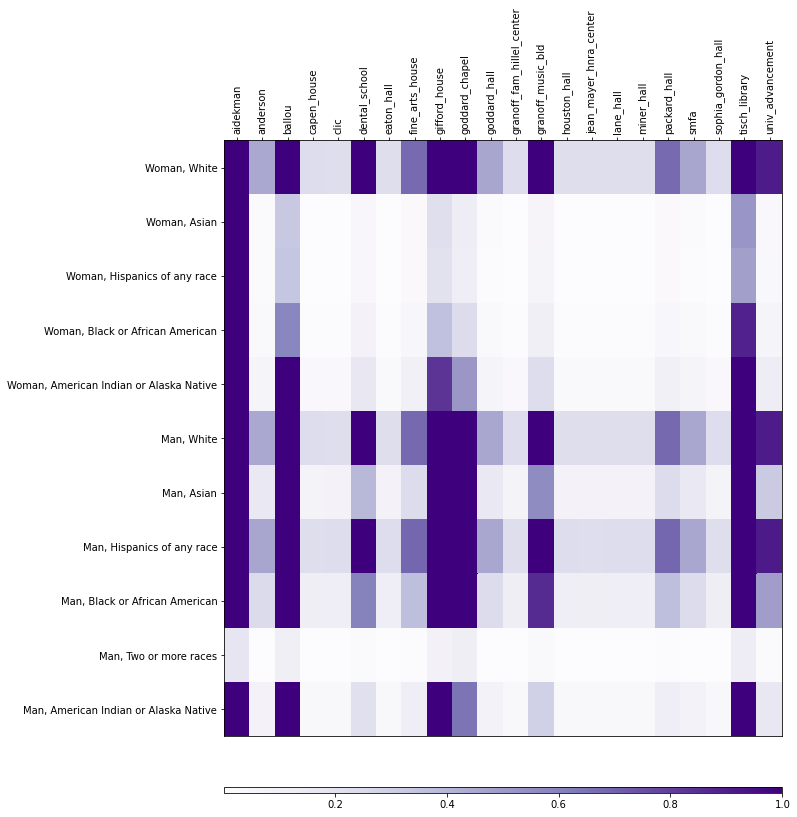

In [19]:
assignment_df = assignment_df.clip(upper = 1)
sc.assignment_heatmat(assignment_df)

## Validation

In the `validation_df` below, the column "Optimized" is the probability of a person from index category seeing their identity according to our assignment, whereas "Baseline" is the probablity of a person from index category seeing their identity accoridng to the current Tufts Gallery assignment.

In [20]:
validation_df = sc.validate_assignment(assignment_df)
validation_df

FileNotFoundError: [Errno 2] No such file or directory: '../data/2021_05_07_Artist_Subject_Donor_Data_v3.csv'